# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In this project, I learned to import libraries and dataset and create a Facebook Prophet machine learning model in order to forecast the price of Tesla 30 days into the future. I also learned how to extract Financial data in Google Sheets using Google Finance and compared the forecasted data with the actual data and evaluated the performance of the model.

All of this information was extracted from finance yahoo, if you change the csv file from another of finance yahoo the forecasting will be done automatically.

In [20]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [21]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [22]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

The Dataset can be found [here](https://finance.yahoo.com/quote/TSLA/history?p=TSLA)

In [ ]:
df = pd.read_csv('TSLA.csv')

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-21,305.623322,313.166656,295.373322,312.843323,312.843323,71517900
1,2021-12-22,321.886658,338.553345,319.016663,336.290009,336.290009,93634200
2,2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
3,2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
4,2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000
...,...,...,...,...,...,...,...
247,2022-12-14,159.250000,161.619995,155.309998,156.800003,156.800003,140682300
248,2022-12-15,153.440002,160.929993,153.279999,157.669998,157.669998,122334500
249,2022-12-16,159.639999,160.990005,150.039993,150.229996,150.229996,138459600
250,2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600


In [ ]:
#See data in more detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
#More statistical information
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,270.621732,277.264127,262.978214,269.789114,269.789114,8.341619e+07
std,54.509960,55.518008,53.414693,54.565841,54.565841,2.354415e+07
min,146.050003,148.470001,137.660004,137.800003,137.800003,4.073370e+07
25%,229.702503,235.389999,222.234997,230.930004,230.930004,6.670328e+07
50%,278.430008,283.744995,269.599991,275.809998,275.809998,8.031765e+07
75%,304.485839,312.208328,298.424996,306.240829,306.240829,9.562590e+07
max,396.516663,402.666656,378.679993,399.926666,399.926666,1.758627e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x='Date', y='Close')

We get a graph of Tesla's historical performance of one year.

In [ ]:
px.line(df, x='Date', y='Close')

In [ ]:
px.area(df, x='Date', y='Volume')

The average transactional volume of Tesla daily is between 60 million sales and 80 million sales and there are times when it surges to extremely high, like in December 13 2022, during that time the transaction volume was extremely high. The reason for the high transaction volumes of Tesla on December 13 is because Elon Musk took over Twitter

In [ ]:
px.bar(df, y='Volume')

In [ ]:
px.box(df, y='Close')

So far we visualized Tesla's historical performance using plotly express. We created area graphs, line graphs, box plot. We analyzed price and volume.

# Understanding Facebook Prophet

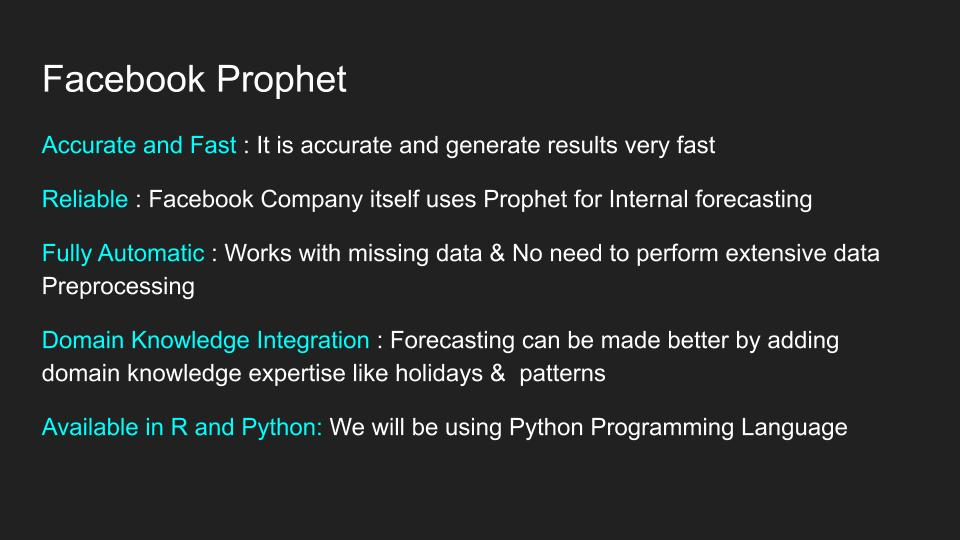

## Data Preparation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-21,305.623322,313.166656,295.373322,312.843323,312.843323,71517900
1,2021-12-22,321.886658,338.553345,319.016663,336.290009,336.290009,93634200
2,2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
3,2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
4,2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000
...,...,...,...,...,...,...,...
247,2022-12-14,159.250000,161.619995,155.309998,156.800003,156.800003,140682300
248,2022-12-15,153.440002,160.929993,153.279999,157.669998,157.669998,122334500
249,2022-12-16,159.639999,160.990005,150.039993,150.229996,150.229996,138459600
250,2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600


In [ ]:
columns = ['Date','Close']
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2021-12-21,312.843323
1,2021-12-22,336.290009
2,2021-12-23,355.666656
3,2021-12-27,364.646667
4,2021-12-28,362.823334
...,...,...
247,2022-12-14,156.800003
248,2022-12-15,157.669998
249,2022-12-16,150.229996
250,2022-12-19,149.869995


In [ ]:
  prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2021-12-21,312.843323
1,2021-12-22,336.290009
2,2021-12-23,355.666656
3,2021-12-27,364.646667
4,2021-12-28,362.823334
...,...,...
247,2022-12-14,156.800003
248,2022-12-15,157.669998
249,2022-12-16,150.229996
250,2022-12-19,149.869995


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-21,338.251966,305.410948,381.054811,338.251966,338.251966,4.871378,4.871378,4.871378,4.871378,4.871378,4.871378,0.0,0.0,0.0,343.123344
1,2021-12-22,337.777204,308.728129,380.037307,337.777204,337.777204,6.122898,6.122898,6.122898,6.122898,6.122898,6.122898,0.0,0.0,0.0,343.900102
2,2021-12-23,337.302443,305.136831,381.223483,337.302443,337.302443,4.811856,4.811856,4.811856,4.811856,4.811856,4.811856,0.0,0.0,0.0,342.114299
3,2021-12-27,335.403397,302.814755,378.195303,335.403397,335.403397,7.863256,7.863256,7.863256,7.863256,7.863256,7.863256,0.0,0.0,0.0,343.266653
4,2021-12-28,334.928636,303.583515,375.510237,334.928636,334.928636,4.871378,4.871378,4.871378,4.871378,4.871378,4.871378,0.0,0.0,0.0,339.800014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2023-01-15,125.687398,75.249694,149.906020,123.289815,127.996663,-13.047695,-13.047695,-13.047695,-13.047695,-13.047695,-13.047695,0.0,0.0,0.0,112.639703
278,2023-01-16,124.557925,96.321408,169.080607,121.948259,126.988119,7.863256,7.863256,7.863256,7.863256,7.863256,7.863256,0.0,0.0,0.0,132.421181
279,2023-01-17,123.428452,90.406567,166.319836,120.650202,126.023534,4.871378,4.871378,4.871378,4.871378,4.871378,4.871378,0.0,0.0,0.0,128.299831
280,2023-01-18,122.298980,91.718946,164.166003,119.369991,124.998333,6.122898,6.122898,6.122898,6.122898,6.122898,6.122898,0.0,0.0,0.0,128.421877


In [ ]:
px.line(forecast, x='ds', y='yhat')

We can see a falling curve, which means that Facebook Prophet is confident that the price is going to fall for the next 30 days

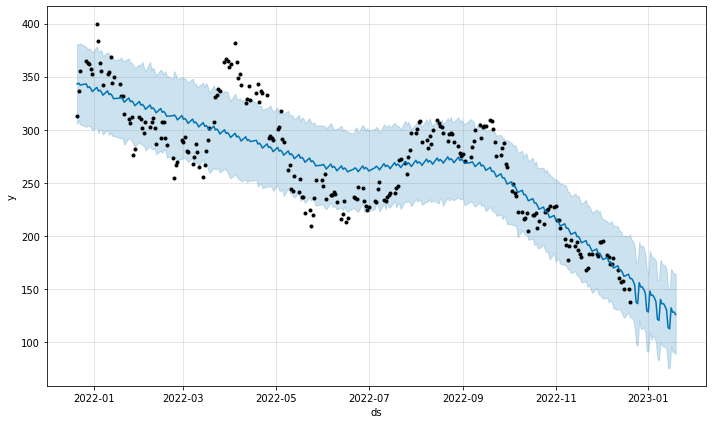

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

The black dots are the actual price of Tesla, it goes up and down, in blue we can see the forecasted price.

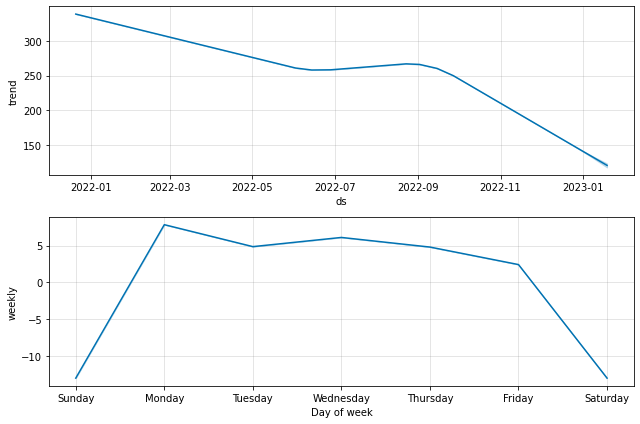

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analyzing the data from google sheets

https://docs.google.com/spreadsheets/d/e/2PACX-1vR1rzT-SA5-fb45IBsV7c_iWZNsKwTXIOJ4s9lqOKLwhyS_SXaI1SVr2EsdSCboyKh4a1E_1UEcak5r/pubhtml